# Importing Necessary Libraries

In [449]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Read the Data Set

In [450]:
data = pd.read_excel("EBP.xlsx")

In [451]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


# General Data Description

In [452]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [453]:
data = data.drop('Date of Joining', axis = 1)

In [454]:
data = data.drop('Employee ID', axis = 1)

In [455]:
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data['Company Type'] = data['Company Type'].replace({'Product': 0, 'Service': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].replace({'No': 0, 'Yes': 1})



In [456]:
data_1 = data

In [457]:
data_1.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
2,0,0,1,2,NaN,5.8,0.49
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52


In [458]:
data_1.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [459]:
data_nonull = data.dropna()

In [460]:
data_nonull.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52
5,1,0,1,2,4.0,3.6,0.29


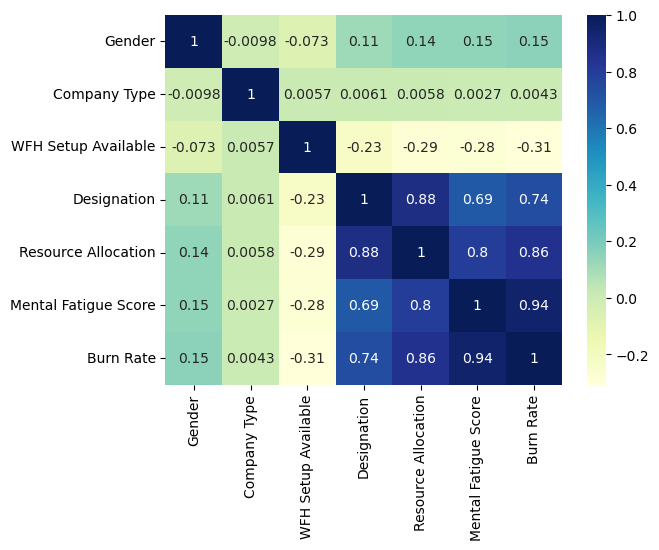

In [461]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

In [462]:
data.isnull().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [463]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [464]:
# Resource Allocation

In [465]:
# this data contains null values of only 'Resource Allocation' from 'data' set

ra_test_data = data[
    data['Resource Allocation'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation']]

In [466]:
ra_test_data.shape

(1381, 5)

In [467]:
ra_test_data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation
2,0,0,1,2,NaN
23,0,0,1,3,NaN
25,0,1,1,3,NaN
48,0,0,0,3,NaN
61,1,0,0,3,NaN


In [468]:
ra_test_data.isnull().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation    1381
dtype: int64

In [469]:
columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation']
ra_train_data = data_nonull[columns_to_keep]

In [470]:
ra_train_data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation
0,0,1,0,2,3.0
1,1,1,1,1,2.0
3,1,1,1,1,1.0
4,0,1,0,3,7.0
5,1,0,1,2,4.0


In [471]:
ra_train_data.isnull().sum()

Gender                 0
Company Type           0
WFH Setup Available    0
Designation            0
Resource Allocation    0
dtype: int64

In [472]:
ra_train_data.shape


(18590, 5)

In [473]:
ra_y_train = ra_train_data['Resource Allocation']

In [474]:
ra_y_train

0        3.0
1        2.0
3        1.0
4        7.0
5        4.0
        ... 
22743    3.0
22744    7.0
22746    6.0
22748    5.0
22749    6.0
Name: Resource Allocation, Length: 18590, dtype: float64

In [475]:
ra_x_train = ra_train_data.drop("Resource Allocation",axis =1)

In [476]:
ra_x_train.head()


,Gender,Company Type,WFH Setup Available,Designation
0,0,1,0,2
1,1,1,1,1
3,1,1,1,1
4,0,1,0,3
5,1,0,1,2


In [477]:
lr = LinearRegression()

In [478]:
lr.fit(ra_x_train, ra_y_train)

LinearRegression()

In [479]:
# contains the ra_test_data without the Resouce Allocation feature

ra_X_test = ra_test_data.drop("Resource Allocation", axis=1)

In [480]:
ra_X_test.shape

(1381, 4)

In [481]:
ra_y_pred = lr.predict(ra_X_test)

In [550]:
ra_y_pred

array([3.97620432, 5.51705349, 5.51030904, ..., 7.39751106, 2.9474839 ,
       7.21693411])

In [551]:
ra_test_data.loc[ra_test_data['Resource Allocation'].isnull(), 'Resource Allocation'] = ra_y_pred


In [553]:
ra_test_data

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation
2,0,0,1,2,3.976204
23,0,0,1,3,5.517053
25,0,1,1,3,5.510309
48,0,0,0,3,5.863406
61,1,0,0,3,6.029182
...,...,...,...,...,...
22682,1,1,0,4,7.563287
22701,0,1,0,1,2.774964
22708,0,1,0,4,7.397511
22721,1,0,0,1,2.947484


In [554]:
ra_test_data.isnull().sum()

Gender                 0
Company Type           0
WFH Setup Available    0
Designation            0
Resource Allocation    0
dtype: int64

In [555]:
ra_test_data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation
2,0,0,1,2,3.976204
23,0,0,1,3,5.517053
25,0,1,1,3,5.510309
48,0,0,0,3,5.863406
61,1,0,0,3,6.029182


In [556]:
ra_test_data.shape

(1381, 5)

In [557]:
ra_test_data.isnull().sum()

Gender                 0
Company Type           0
WFH Setup Available    0
Designation            0
Resource Allocation    0
dtype: int64

In [558]:
data['Resource Allocation'] = data['Resource Allocation'].fillna(ra_test_data['Resource Allocation'])


In [559]:
data.isnull().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation       0
Mental Fatigue Score    202
Burn Rate               103
dtype: int64

In [560]:
data.head()


,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.000000,3.8,0.16
1,1,1,1,1,2.000000,5.0,0.36
2,0,0,1,2,3.976204,5.8,0.49
3,1,1,1,1,1.000000,2.6,0.20
4,0,1,0,3,7.000000,6.9,0.52


In [561]:
data.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22548.000000,22647.000000
mean,0.476571,0.652000,0.540220,2.178725,4.481572,5.726649,0.451856
std,0.499462,0.476346,0.498391,1.135145,2.032034,1.893389,0.197692
min,0.000000,0.000000,0.000000,0.000000,0.887762,0.000000,-0.072899
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.523396,0.320000
50%,0.000000,1.000000,1.000000,2.000000,4.000000,5.900000,0.450000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.005607,0.590000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000


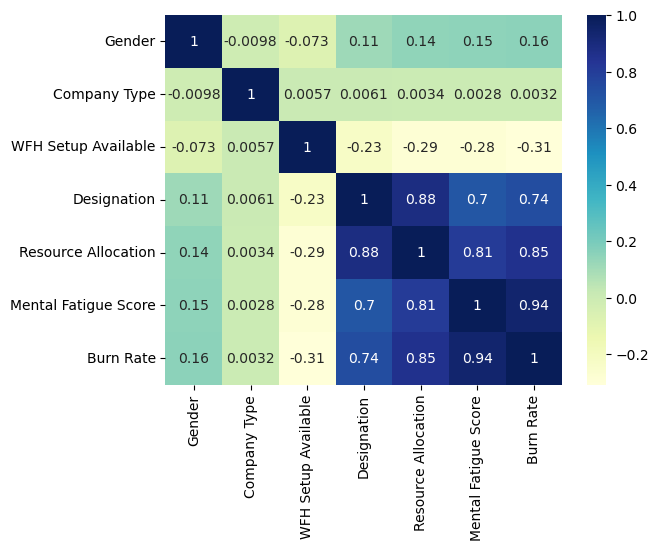

In [562]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

In [563]:
# mental fatigue Score

In [564]:
mfs_test_data = data[
    data['Mental Fatigue Score'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score']]

In [565]:
mfs_test_data.isnull().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation       0
Mental Fatigue Score    202
dtype: int64

In [566]:
mfs_test_data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
229,0,0,0,2,4.322557,NaN
415,0,1,1,2,3.969460,NaN
696,0,1,1,2,3.969460,NaN
813,0,1,1,2,3.969460,NaN
933,1,1,1,4,7.216934,NaN


In [567]:
columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score']
mfs_train_data = data_nonull[columns_to_keep]

In [568]:
mfs_train_data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0,1,0,2,3.0,3.8
1,1,1,1,1,2.0,5.0
3,1,1,1,1,1.0,2.6
4,0,1,0,3,7.0,6.9
5,1,0,1,2,4.0,3.6


In [569]:
mfs_y_train = mfs_train_data['Mental Fatigue Score']

In [570]:
mfs_y_train

0        3.8
1        5.0
3        2.6
4        6.9
5        3.6
        ... 
22743    6.0
22744    6.2
22746    6.7
22748    5.9
22749    7.8
Name: Mental Fatigue Score, Length: 18590, dtype: float64

In [571]:
mfs_x_train = mfs_train_data.drop("Mental Fatigue Score",axis =1)

In [572]:
mfs_x_train.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation
0,0,1,0,2,3.0
1,1,1,1,1,2.0
3,1,1,1,1,1.0
4,0,1,0,3,7.0
5,1,0,1,2,4.0


In [573]:
lr = LinearRegression()

In [574]:
lr.fit(mfs_x_train, mfs_y_train)

LinearRegression()

In [575]:
# contains the ra_test_data without the Resouce Allocation feature

mfs_X_test = mfs_test_data.drop("Mental Fatigue Score", axis=1)

In [576]:
mfs_X_test.shape

(202, 5)

In [577]:
mfs_y_pred = lr.predict(mfs_X_test)

In [578]:
mfs_y_pred

array([5.66761708, 5.19982905, 5.19982905, 5.19982905, 7.67322743,
       4.33390934, 5.91197466, 5.19982905, 6.31293508, 4.33673807,
       5.4498441 , 7.02508069, 4.33673807, 4.08672302, 6.77789438,
       5.66478835, 5.19982905, 6.31293508, 4.55168232, 6.31576382,
       6.78072311, 3.22080331, 6.77789438, 6.56295013, 5.19982905,
       4.80169736, 7.02790942, 5.44701537, 5.19982905, 7.02508069,
       5.44701537, 6.31293508, 8.14101545, 5.19982905, 5.91197466,
       7.89382914, 6.56295013, 8.14101545, 3.6857626 , 6.31576382,
       4.08672302, 7.02508069, 7.02508069, 5.91480339, 6.31293508,
       5.20265779, 6.31576382, 6.78072311, 5.66761708, 5.20265779,
       7.02508069, 6.31293508, 6.5601214 , 5.91480339, 5.20265779,
       3.6857626 , 5.91197466, 4.08672302, 5.44701537, 6.77789438,
       4.33673807, 8.14101545, 6.31293508, 4.55168232, 2.97361699,
       6.31576382, 4.33673807, 4.08672302, 7.02508069, 6.56295013,
       9.00410644, 6.78072311, 6.77789438, 5.91480339, 6.31293

In [579]:
mfs_test_data.loc[mfs_test_data['Mental Fatigue Score'].isnull(), 'Mental Fatigue Score'] = mfs_y_pred


In [580]:
mfs_test_data

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
229,0,0,0,2,4.322557,5.667617
415,0,1,1,2,3.969460,5.199829
696,0,1,1,2,3.969460,5.199829
813,0,1,1,2,3.969460,5.199829
933,1,1,1,4,7.216934,7.673227
...,...,...,...,...,...,...
22483,1,0,1,2,4.141980,5.449844
22597,1,1,0,3,6.022438,7.025081
22606,1,0,0,2,4.488333,5.914803
22708,0,1,0,4,7.397511,7.891000


In [581]:
mfs_test_data.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [582]:
data['Mental Fatigue Score'] = data['Mental Fatigue Score'].fillna(mfs_test_data['Mental Fatigue Score'])


In [583]:
data.isnull().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation       0
Mental Fatigue Score      0
Burn Rate               103
dtype: int64

In [584]:
data.shape

(22750, 7)

In [585]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.000000,3.8,0.16
1,1,1,1,1,2.000000,5.0,0.36
2,0,0,1,2,3.976204,5.8,0.49
3,1,1,1,1,1.000000,2.6,0.20
4,0,1,0,3,7.000000,6.9,0.52


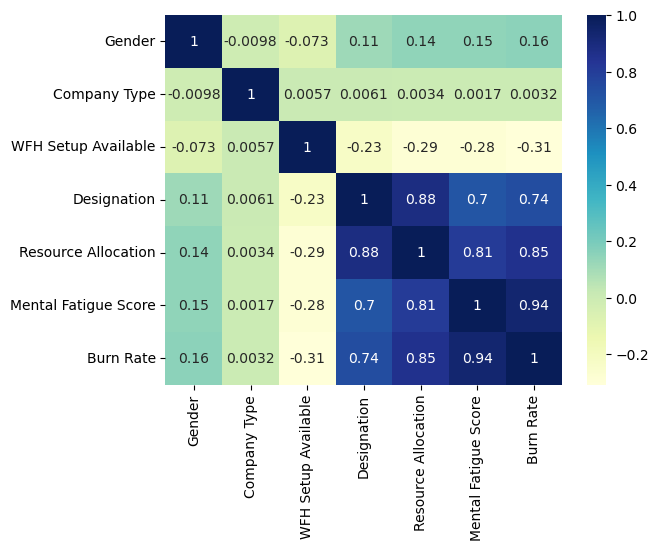

In [586]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 


In [587]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.000000,3.8,0.16
1,1,1,1,1,2.000000,5.0,0.36
2,0,0,1,2,3.976204,5.8,0.49
3,1,1,1,1,1.000000,2.6,0.20
4,0,1,0,3,7.000000,6.9,0.52


In [588]:
data.isnull().sum()

Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation       0
Mental Fatigue Score      0
Burn Rate               103
dtype: int64

In [589]:
data.shape

(22750, 7)

In [590]:
# burn rate

In [591]:
br_test_data = data[
    data['Burn Rate'].isnull() & 
    data[['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score']].notnull().all(axis=1)
][['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']]

In [592]:
br_test_data.isnull().sum()


Gender                    0
Company Type              0
WFH Setup Available       0
Designation               0
Resource Allocation       0
Mental Fatigue Score      0
Burn Rate               103
dtype: int64

In [593]:
br_test_data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
221,1,1,1,1,2.594387,4.8,NaN
567,1,1,0,4,7.563287,6.4,NaN
947,0,0,0,2,4.322557,7.7,NaN
1096,1,0,0,3,6.029182,7.3,NaN
1187,0,1,0,3,5.856662,7.2,NaN


In [594]:
br_test_data.shape

(103, 7)

In [595]:
columns_to_keep = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']
br_train_data = data_nonull[columns_to_keep]

In [596]:
br_train_data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
3,1,1,1,1,1.0,2.6,0.20
4,0,1,0,3,7.0,6.9,0.52
5,1,0,1,2,4.0,3.6,0.29


In [597]:
br_y_train = br_train_data['Burn Rate']


In [598]:
br_y_train

0        0.16
1        0.36
3        0.20
4        0.52
5        0.29
         ... 
22743    0.48
22744    0.54
22746    0.59
22748    0.52
22749    0.61
Name: Burn Rate, Length: 18590, dtype: float64

In [599]:
br_x_train = br_train_data.drop("Burn Rate",axis =1)

In [600]:
br_x_train.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0,1,0,2,3.0,3.8
1,1,1,1,1,2.0,5.0
3,1,1,1,1,1.0,2.6
4,0,1,0,3,7.0,6.9
5,1,0,1,2,4.0,3.6


In [601]:
lr = LinearRegression()

In [602]:
lr.fit(br_x_train, br_y_train)

LinearRegression()

In [603]:
br_X_test = br_test_data.drop("Burn Rate", axis=1)

In [604]:
br_X_test.shape

(103, 6)

In [605]:
br_y_pred = lr.predict(br_X_test)

In [606]:
br_y_pred

array([ 0.33223411,  0.58985861,  0.5978023 ,  0.61674826,  0.6004633 ,
        0.66135966,  0.73523627,  0.60964603,  0.29772445,  0.47487305,
        0.71127823,  0.39190328,  0.34521437,  0.52838175,  0.42088605,
        0.62539913,  0.47555576,  0.35355436,  0.36168256,  0.41728139,
        0.4751772 ,  0.38215268,  0.33281462,  0.24358217,  0.6907495 ,
        0.45743673,  0.73621405, -0.06197296,  0.59458527,  0.45811943,
        0.38954034,  0.45840486,  0.36975292,  0.13835984,  0.39182683,
        0.48139478,  0.19508557,  0.77275509,  0.553603  ,  0.2703569 ,
        0.60698503,  0.22199969,  0.54816916,  0.47510074,  0.22870465,
        0.35998969,  0.61523862,  0.26632566,  0.61286306,  0.75306987,
        0.42551052,  0.73563354,  0.54089368,  0.43094435,  0.41645446,
        0.47790685,  0.3261868 ,  0.54089368,  0.31007112,  0.59279021,
        0.85581443,  0.40848629,  0.22113375,  0.39190328,  0.39190328,
        0.49004565,  0.2533454 ,  0.56629783,  0.43706881,  0.44

In [607]:
br_test_data.loc[br_test_data['Burn Rate'].isnull(), 'Burn Rate'] = br_y_pred


In [608]:
br_test_data.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [609]:
br_test_data.shape

(103, 7)

In [610]:
br_test_data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
221,1,1,1,1,2.594387,4.8,0.332234
567,1,1,0,4,7.563287,6.4,0.589859
947,0,0,0,2,4.322557,7.7,0.597802
1096,1,0,0,3,6.029182,7.3,0.616748
1187,0,1,0,3,5.856662,7.2,0.600463


In [611]:
data['Burn Rate'] = data['Burn Rate'].fillna(br_test_data['Burn Rate'])


In [612]:
data.shape

(22750, 7)

In [613]:
data.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

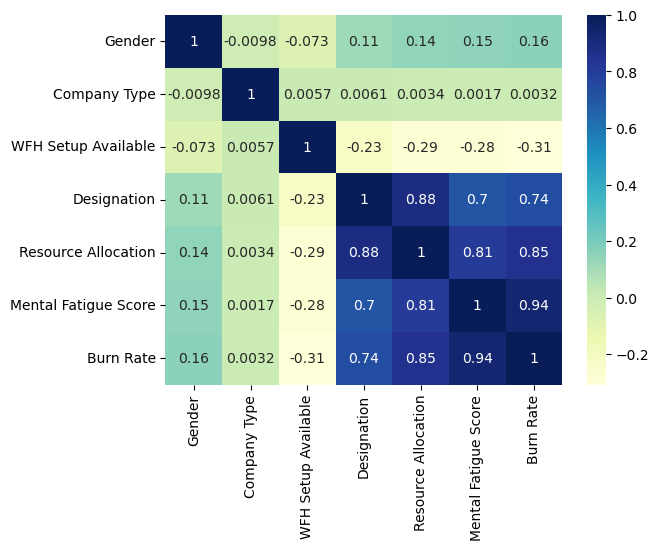

In [614]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 


In [615]:
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [616]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [617]:
lr.fit(X_train, y_train)

LinearRegression()

In [618]:
prediction = lr.predict(X_test)
print('Linear Regression: ')
r2_score(y_test, prediction)

Linear Regression: 


0.907864995429974

In [619]:
predictions = lr.predict(X_test)

#calculate mean squared error
mse = mean_squared_error(y_test, predictions)

#calculate root mean square error
rmse = np.sqrt(mse)

#calculate mean absolute error
mae = mean_absolute_error(y_test, predictions)

#calculate R-squared error
r2 = r2_score(y_test, predictions)


print('Linear Regression Model Performance Matrix:\n')

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Linear Regression Model Performance Matrix:

Mean Squared Error: 0.003532139558805119
Root Mean Squared Error: 0.059431805952748225
Mean Absolute Error: 0.04620082560642336
R-squared: 0.907864995429974


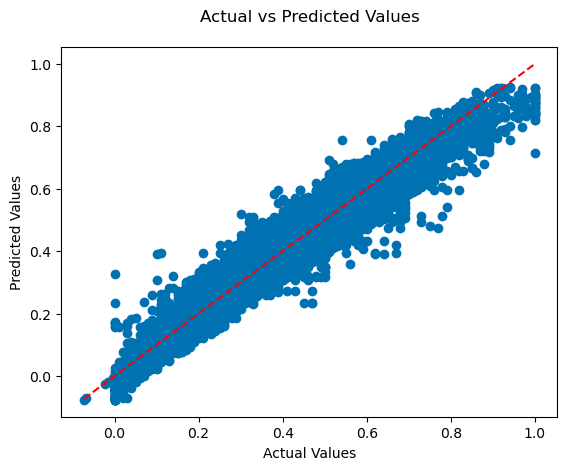

In [620]:
plt.scatter(x=y_test,y=predictions)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r',linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values\n')
plt.show()

In [621]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')